In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_csv('Acoustic_Extinguisher_Fire_Dataset.csv')

In [4]:
data

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,gasoline,10,96.0,0.0,75.0,0
1,1.0,gasoline,10,96.0,0.0,72.0,1
2,1.0,gasoline,10,96.0,2.6,70.0,1
3,1.0,gasoline,10,96.0,3.2,68.0,1
4,NaN,gasoline,10,109.0,4.5,67.0,1
...,...,...,...,...,...,...,...
17437,7.0,lpg,190,86.0,2.2,5.0,0
17438,7.0,lpg,190,84.0,2.0,4.0,0
17439,7.0,lpg,190,80.0,1.5,3.0,0
17440,7.0,lpg,190,76.0,0.4,2.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       16919 non-null  float64
 1   FUEL       16920 non-null  object 
 2   DISTANCE   16920 non-null  object 
 3   DESIBEL    16919 non-null  float64
 4   AIRFLOW    16919 non-null  float64
 5   FREQUENCY  16919 non-null  float64
 6   STATUS     17442 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 954.0+ KB


In [6]:
data.describe()

,SIZE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,16919.000000,16919.000000,16919.000000,16919.000000,17442.000000
mean,3.415214,96.376441,6.977499,31.615639,0.497821
std,1.752139,8.160081,4.736850,20.954487,0.500010
min,1.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,95.000000,5.800000,27.000000,0.000000
75%,5.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,113.000000,17.000000,75.000000,1.000000


In [48]:
data.shape

(17442, 7)

In [8]:
data.isnull().sum()

SIZE         523
FUEL         522
DISTANCE     522
DESIBEL      523
AIRFLOW      523
FREQUENCY    523
STATUS         0
dtype: int64

In [9]:
columns = ['SIZE','DESIBEL', 'AIRFLOW', 'FREQUENCY','STATUS']
for i in columns:
    data[i] = data[i].fillna(data[i].median())

In [11]:
data['FUEL'] = data['FUEL'].fillna(data['FUEL'].mode()[0])

In [12]:
data.isnull().sum()

SIZE           0
FUEL           0
DISTANCE     522
DESIBEL        0
AIRFLOW        0
FREQUENCY      0
STATUS         0
dtype: int64

In [56]:
data['SIZE'].value_counts()

3.0    3506
5.0    2991
4.0    2990
1.0    2985
2.0    2972
7.0    1001
6.0     997
Name: SIZE, dtype: int64

In [16]:
data['DISTANCE'].unique()

array(['10', '20', nan, '30', '40', '50', '60', '70', '80', '90', '100',
       '110', '120', '130', '140', '150', '160', '170', '180', '190'],
      dtype=object)

In [18]:
data['DISTANCE'] = data['DISTANCE'].fillna(data['DISTANCE'].median())

In [19]:
data['DISTANCE'] = data['DISTANCE'].astype(int)

In [14]:
data[data['DISTANCE'] == '$$']

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
371,1.0,gasoline,$$,90.0,10.2,7.0,1


In [15]:
data.drop([371], axis = 0, inplace = True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17441 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17441 non-null  float64
 1   FUEL       17441 non-null  object 
 2   DISTANCE   17441 non-null  int32  
 3   DESIBEL    17441 non-null  float64
 4   AIRFLOW    17441 non-null  float64
 5   FREQUENCY  17441 non-null  float64
 6   STATUS     17441 non-null  int64  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 1021.9+ KB


In [24]:
data['FUEL'].unique()

array(['gasoline', 'kerosene', 'thinner', 'lpg'], dtype=object)

In [22]:
data[data['FUEL'] == '%%']

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
194,1.0,%%,40,87.0,13.2,22.0,1


In [23]:
data.drop([194], axis = 0, inplace = True)

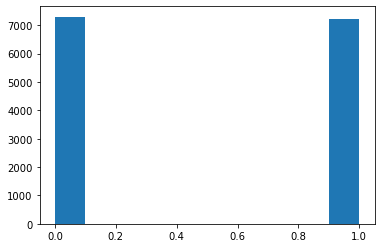

In [15]:
plt.hist(x = data['STATUS'])
plt.show()

In [16]:
data.columns

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

In [17]:
data['SIZE'].unique()

array([1., 2., 3., 4., 5., 6., 7.])

In [18]:
data['SIZE'].value_counts()

1.0    2594
3.0    2577
5.0    2566
2.0    2555
4.0    2527
7.0     858
6.0     847
Name: SIZE, dtype: int64

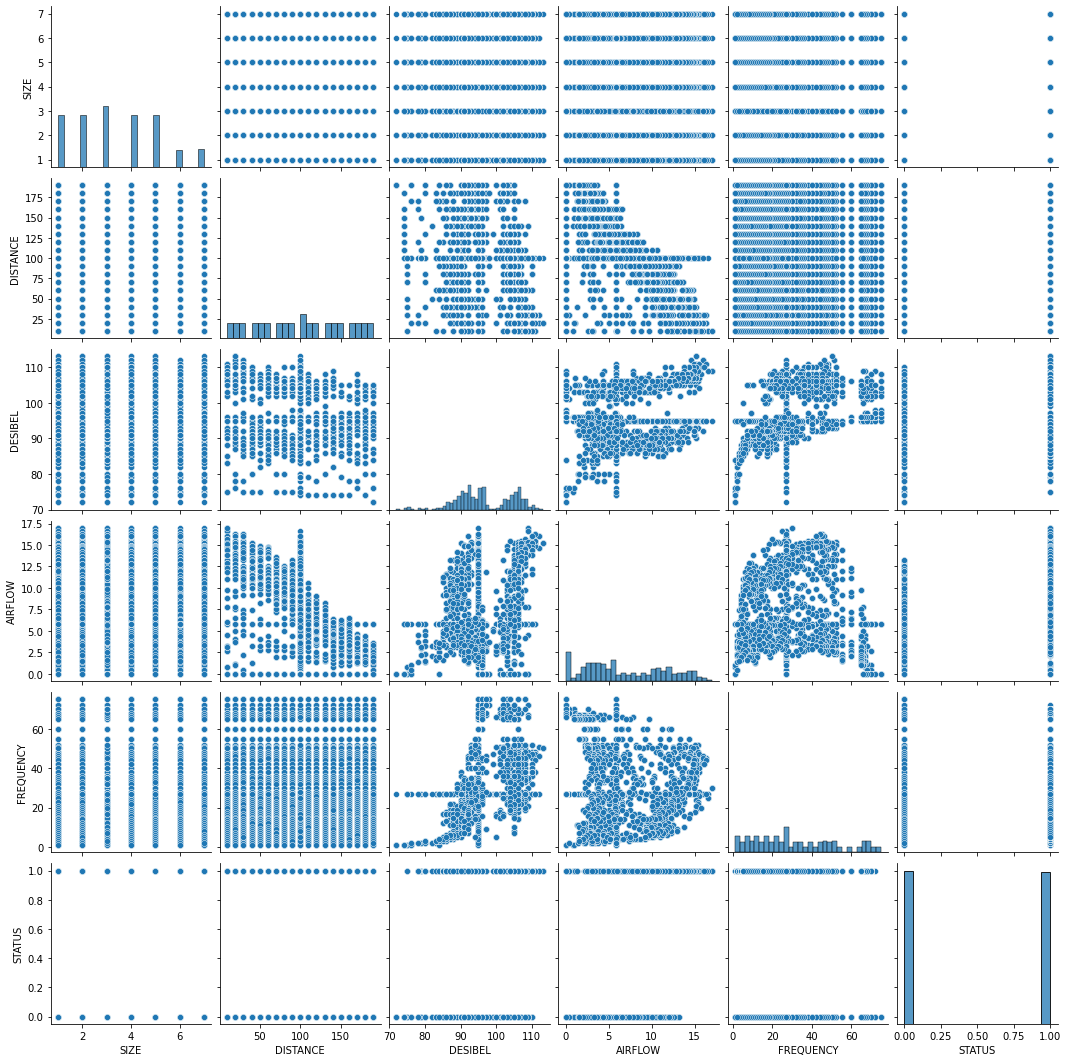

In [25]:
sns.pairplot(data)

In [76]:
data.corr()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000,0.002616,0.000813,-0.000787,-0.001862,-0.094812
DISTANCE,0.002616,1.000000,-0.231422,-0.684741,-0.002290,-0.633771
DESIBEL,0.000813,-0.231422,1.000000,0.364335,0.545626,0.199058
AIRFLOW,-0.000787,-0.684741,0.364335,1.000000,-0.204416,0.749292
FREQUENCY,-0.001862,-0.002290,0.545626,-0.204416,1.000000,-0.239714
STATUS,-0.094812,-0.633771,0.199058,0.749292,-0.239714,1.000000


<AxesSubplot:xlabel='STATUS', ylabel='DISTANCE'>

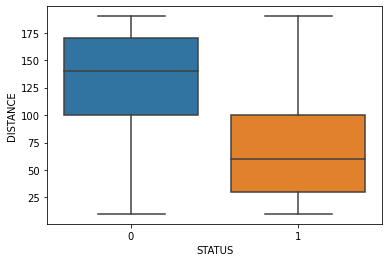

In [77]:
sns.boxplot(x = 'STATUS', y = 'DISTANCE', data = data)

<AxesSubplot:xlabel='STATUS', ylabel='AIRFLOW'>

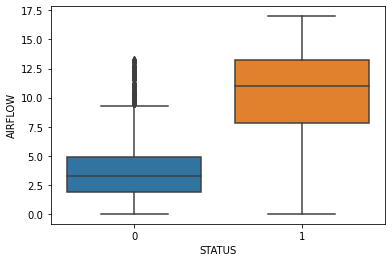

In [78]:
sns.boxplot(x = 'STATUS', y = 'AIRFLOW', data = data)

<AxesSubplot:>

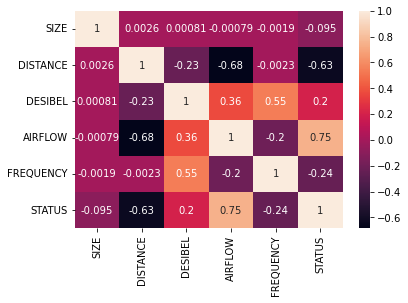

In [82]:
sns.heatmap(data.corr(), annot = True)

In [99]:
data['FUEL'].unique()

array(['gasoline', 'kerosene', 'thinner', 'lpg'], dtype=object)

In [26]:
oe = OneHotEncoder(sparse = False)

In [27]:
fuel = pd.DataFrame(oe.fit_transform(data[['FUEL']]),columns =['gasoline', 'kerosene', 'thinner', 'lpg'])

In [28]:
data = data.join(fuel)

In [29]:
data.drop('FUEL', axis = 1, inplace = True)

In [30]:
data.shape

(17440, 10)

In [31]:
data

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,gasoline,kerosene,thinner,lpg
0,1.0,10,96.0,0.0,75.0,0,1.0,0.0,0.0,0.0
1,1.0,10,96.0,0.0,72.0,1,1.0,0.0,0.0,0.0
2,1.0,10,96.0,2.6,70.0,1,1.0,0.0,0.0,0.0
3,1.0,10,96.0,3.2,68.0,1,1.0,0.0,0.0,0.0
4,3.0,10,109.0,4.5,67.0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17437,7.0,190,86.0,2.2,5.0,0,0.0,0.0,1.0,0.0
17438,7.0,190,84.0,2.0,4.0,0,0.0,0.0,1.0,0.0
17439,7.0,190,80.0,1.5,3.0,0,0.0,0.0,1.0,0.0
17440,7.0,190,76.0,0.4,2.0,0,NaN,NaN,NaN,NaN


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17440 entries, 0 to 17441
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17440 non-null  float64
 1   DISTANCE   17440 non-null  int32  
 2   DESIBEL    17440 non-null  float64
 3   AIRFLOW    17440 non-null  float64
 4   FREQUENCY  17440 non-null  float64
 5   STATUS     17440 non-null  int64  
 6   gasoline   17438 non-null  float64
 7   kerosene   17438 non-null  float64
 8   thinner    17438 non-null  float64
 9   lpg        17438 non-null  float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 1.9 MB


In [35]:
data.isnull().sum()

SIZE         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
gasoline     0
kerosene     0
thinner      0
lpg          0
dtype: int64

In [113]:
data.columns

Index(['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY', 'STATUS',
       'gasoline', 'kerosene', 'thinner', 'lpg'],
      dtype='object')

In [34]:
col = ['gasoline', 'kerosene', 'thinner', 'lpg']
for i in col:
    data[i] = data[i].fillna(data[i].median())

In [117]:
data.corr()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,gasoline,kerosene,thinner,lpg
SIZE,1.000000,0.002616,0.000813,-0.000787,-0.001862,-0.094812,-0.146223,-0.142496,0.623273,-0.146367
DISTANCE,0.002616,1.000000,-0.231422,-0.684741,-0.002290,-0.633771,-0.001161,-0.001494,0.002166,0.000750
DESIBEL,0.000813,-0.231422,1.000000,0.364335,0.545626,0.199058,0.003185,-0.001755,-0.000159,-0.000557
AIRFLOW,-0.000787,-0.684741,0.364335,1.000000,-0.204416,0.749292,-0.000436,0.001265,-0.001619,0.000639
FREQUENCY,-0.001862,-0.002290,0.545626,-0.204416,1.000000,-0.239714,0.001137,-0.001374,0.000589,0.000074
STATUS,-0.094812,-0.633771,0.199058,0.749292,-0.239714,1.000000,0.048452,-0.060576,0.042742,-0.015845
gasoline,-0.146223,-0.001161,0.003185,-0.000436,0.001137,0.048452,1.000000,-0.428833,-0.226094,-0.398108
kerosene,-0.142496,-0.001494,-0.001755,0.001265,-0.001374,-0.060576,-0.428833,1.000000,-0.244024,-0.429679
thinner,0.623273,0.002166,-0.000159,-0.001619,0.000589,0.042742,-0.226094,-0.244024,1.000000,-0.226540
lpg,-0.146367,0.000750,-0.000557,0.000639,0.000074,-0.015845,-0.398108,-0.429679,-0.226540,1.000000


In [36]:
x = data.drop('STATUS', axis = 1).values
y = data['STATUS'].values

In [37]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.25, random_state = 42)

In [38]:
ss = StandardScaler()

In [39]:
X_train = ss.fit_transform(X_train)

In [40]:
X_test = ss.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
classifier = LogisticRegression()

In [43]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [44]:
Y_pred = classifier.predict(X_test)

In [45]:
Y_train_pred = classifier.predict(X_train)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[1967,  201],
       [ 247, 1945]], dtype=int64)

In [47]:
#testaccuracy
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2168
           1       0.91      0.89      0.90      2192

    accuracy                           0.90      4360
   macro avg       0.90      0.90      0.90      4360
weighted avg       0.90      0.90      0.90      4360



In [48]:
##trainingaccuracy
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6591
           1       0.90      0.88      0.89      6489

    accuracy                           0.89     13080
   macro avg       0.89      0.89      0.89     13080
weighted avg       0.89      0.89      0.89     13080



In [169]:
data.corr()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,gasoline,kerosene,thinner,lpg
SIZE,1.000000,0.002616,0.000813,-0.000787,-0.001862,-0.094812,-0.146223,-0.142496,0.623273,-0.146367
DISTANCE,0.002616,1.000000,-0.231422,-0.684741,-0.002290,-0.633771,-0.001161,-0.001494,0.002166,0.000750
DESIBEL,0.000813,-0.231422,1.000000,0.364335,0.545626,0.199058,0.003185,-0.001755,-0.000159,-0.000557
AIRFLOW,-0.000787,-0.684741,0.364335,1.000000,-0.204416,0.749292,-0.000436,0.001265,-0.001619,0.000639
FREQUENCY,-0.001862,-0.002290,0.545626,-0.204416,1.000000,-0.239714,0.001137,-0.001374,0.000589,0.000074
STATUS,-0.094812,-0.633771,0.199058,0.749292,-0.239714,1.000000,0.048452,-0.060576,0.042742,-0.015845
gasoline,-0.146223,-0.001161,0.003185,-0.000436,0.001137,0.048452,1.000000,-0.428833,-0.226094,-0.398108
kerosene,-0.142496,-0.001494,-0.001755,0.001265,-0.001374,-0.060576,-0.428833,1.000000,-0.244024,-0.429679
thinner,0.623273,0.002166,-0.000159,-0.001619,0.000589,0.042742,-0.226094,-0.244024,1.000000,-0.226540
lpg,-0.146367,0.000750,-0.000557,0.000639,0.000074,-0.015845,-0.398108,-0.429679,-0.226540,1.000000


<AxesSubplot:xlabel='FREQUENCY', ylabel='Density'>

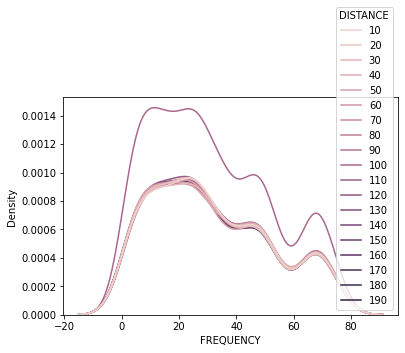

In [172]:
sns.kdeplot(data['FREQUENCY'], hue=data['DISTANCE'])

# Decesion Tree

In [49]:
data

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,gasoline,kerosene,thinner,lpg
0,1.0,10,96.0,0.0,75.0,0,1.0,0.0,0.0,0.0
1,1.0,10,96.0,0.0,72.0,1,1.0,0.0,0.0,0.0
2,1.0,10,96.0,2.6,70.0,1,1.0,0.0,0.0,0.0
3,1.0,10,96.0,3.2,68.0,1,1.0,0.0,0.0,0.0
4,3.0,10,109.0,4.5,67.0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17437,7.0,190,86.0,2.2,5.0,0,0.0,0.0,1.0,0.0
17438,7.0,190,84.0,2.0,4.0,0,0.0,0.0,1.0,0.0
17439,7.0,190,80.0,1.5,3.0,0,0.0,0.0,1.0,0.0
17440,7.0,190,76.0,0.4,2.0,0,0.0,0.0,0.0,0.0


In [54]:
x1 = data.drop('STATUS', axis = 1).values
y1 = data['STATUS'].values

In [92]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size = .3, random_state = 30 )

In [93]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

In [94]:
dc.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [95]:
y1_pred = dc.predict(x1_test)

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, y1_pred)

array([[2464,  130],
       [ 143, 2495]], dtype=int64)

<AxesSubplot:>

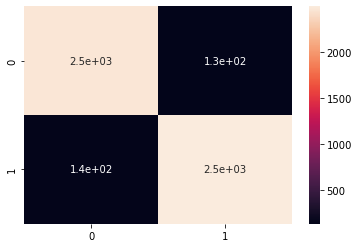

In [97]:
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot = True)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test, y1_pred)

0.9478211009174312

In [133]:
confusion_matrix(y1_test, y1_pred)

array([[2464,  130],
       [ 143, 2495]], dtype=int64)

In [99]:
## for testing data
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2594
           1       0.95      0.95      0.95      2638

    accuracy                           0.95      5232
   macro avg       0.95      0.95      0.95      5232
weighted avg       0.95      0.95      0.95      5232



In [100]:
from sklearn import tree

In [112]:
data.columns[0:4]

Index(['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW'], dtype='object')

In [116]:
data.columns

Index(['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY', 'STATUS',
       'gasoline', 'kerosene', 'thinner', 'lpg'],
      dtype='object')

In [117]:
data

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,gasoline,kerosene,thinner,lpg
0,1.0,10,96.0,0.0,75.0,0,1.0,0.0,0.0,0.0
1,1.0,10,96.0,0.0,72.0,1,1.0,0.0,0.0,0.0
2,1.0,10,96.0,2.6,70.0,1,1.0,0.0,0.0,0.0
3,1.0,10,96.0,3.2,68.0,1,1.0,0.0,0.0,0.0
4,3.0,10,109.0,4.5,67.0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17437,7.0,190,86.0,2.2,5.0,0,0.0,0.0,1.0,0.0
17438,7.0,190,84.0,2.0,4.0,0,0.0,0.0,1.0,0.0
17439,7.0,190,80.0,1.5,3.0,0,0.0,0.0,1.0,0.0
17440,7.0,190,76.0,0.4,2.0,0,0.0,0.0,0.0,0.0


# Random  Forest

In [118]:
n_estimators = [10,20,30,40,50,60,70,80,90,100,120,150]
max_features = ['sqrt','log2']
max_depth=np.linspace(10,120,10 ,dtype=int)
criterion = ['gini','entropy']
min_samples_split = np.linspace(2,20,2 ,dtype=int)

In [119]:
random_grid = {'n_estimators' :n_estimators,
               'max_features' :max_features,
               'max_depth' :max_depth,
               'criterion' :criterion,
               'min_samples_split' :min_samples_split}

In [120]:
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150],
 'max_features': ['sqrt', 'log2'],
 'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
 'criterion': ['gini', 'entropy'],
 'min_samples_split': array([ 2, 20])}

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rfs = RandomForestClassifier()

In [123]:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
rds = RandomizedSearchCV(estimator= rfs, param_distributions = random_grid, cv = 6, n_iter = 10, n_jobs = 1)

In [125]:
rds.fit(x1_train,y1_train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': array([ 2, 20]),
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 120,
                                                         150]})

In [126]:
rds.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 22,
 'criterion': 'entropy'}

In [127]:
rfbp = RandomForestClassifier(n_estimators= 80,min_samples_split= 2,max_features= 'log2',max_depth= 22,criterion= 'entropy')

In [128]:
rfbp.fit(x1_train,y1_train)

RandomForestClassifier(criterion='entropy', max_depth=22, max_features='log2',
                       n_estimators=80)

In [129]:
y_rf_pred = rfbp.predict(x1_test)

In [132]:
confusion_matrix(y1_test, y_rf_pred)

array([[2493,  101],
       [ 107, 2531]], dtype=int64)

<AxesSubplot:>

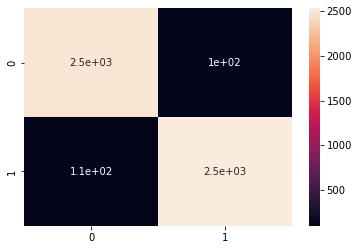

In [131]:
sns.heatmap(confusion_matrix(y1_test, y_rf_pred), annot = True)

In [130]:
print(classification_report(y1_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2594
           1       0.96      0.96      0.96      2638

    accuracy                           0.96      5232
   macro avg       0.96      0.96      0.96      5232
weighted avg       0.96      0.96      0.96      5232

